In [1]:

import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D
import sys
from sklearn.preprocessing import StandardScaler
from sdv.demo import load_tabular_demo
from sdv.tabular import CTGAN
from sdv.evaluation import evaluate
np.set_printoptions(threshold=sys.maxsize)

In [2]:
pwd

'C:\\Users\\zheng\\Desktop\\MUSA 650 RS\\429\\musa650-final\\script'

In [3]:
data_raw= pd.read_csv('..\\rawdata\\landslide3.csv')
data_raw.head()

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,COVER,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,GULLY,CLASS,curv_plan,curv_prof,aspect,curv,ID
0,R,14.0,8.0,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,-9999.000,-9999.0,0
1,R,13.0,6.0,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,-9999.000,-9999.0,1
2,R,15.0,13.5,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,295.115,-9999.0,2
3,R,18.0,10.0,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,150.945,-9999.0,3
4,R,17.0,10.0,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,133.977,-9999.0,4


#### data process


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLASS', ylabel='count'>

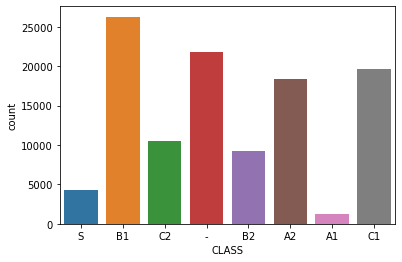

In [4]:
#lot of '-' meaning uncategorized landslide
sns.countplot(data_raw['CLASS'] )

In [5]:
#todo: nothing to change here, we select 20000 data randomly
data=data_raw.sample(n=20000)

In [6]:
data.shape

(20000, 16)

C:\Users\zheng\AppData\Local\Temp/ipykernel_1880/3306246812.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['history']=2022-data1['YEAR_1']
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SLIDE_TYPE', ylabel='count'>

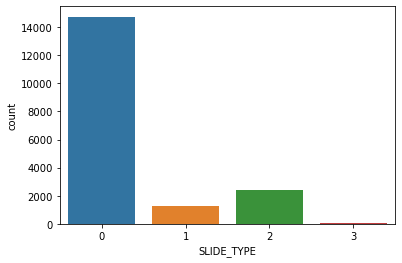

In [7]:
data1=data[~data['SLOPE'].isin([9999])]
data1=data[~data['HEADELEV'].isin([9999])]
data1=data[~data['TAILELEV'].isin([9999])]
data1=data[~data['ELE_DIFF'].isin([9999])]

#newly added data: curv_plan, curv_prof, aspect, curv
data1=data[~data['curv_plan'].isin([-9999])]
data1=data[~data['curv_prof'].isin([-9999])]
data1=data[~data['aspect'].isin([-9999])]
data1=data[~data['curv'].isin([-9999])]

data1['history']=2022-data1['YEAR_1']
data1=data1.drop(['YEAR_1','CLASS','ID'], axis=1)
#remove class
data2 = pd.get_dummies(data1, columns=['COVER','GULLY'])
#Y variable: SLIDE_TYPE
def slide_type(slide_type1):
    if slide_type1 == 'R':
        return 0
    elif slide_type1 == 'C':
        return 1
    elif slide_type1 == 'O':
        return 2
    else :
        return 3
    
data2['SLIDE_TYPE'] = data2['SLIDE_TYPE'].apply(slide_type)

sns.countplot(data2['SLIDE_TYPE'] )

In [8]:
data2.shape

(18391, 18)

In [9]:
data2.head()

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,curv_plan,curv_prof,aspect,curv,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y
83186,0,11.0,13.0,9999.0,9999.0,9999.0,9999.0,-0.016101,-0.003815,6.59992,-0.012286,59,0,0,1,0,1,0
51362,0,13.0,7.5,36.0,347.0,341.0,6.0,-0.323513,0.327648,97.43140,-0.651161,59,0,0,1,0,1,0
37028,0,19.0,21.0,24.5,210.0,197.0,13.0,-0.145589,-0.084158,217.83100,-0.061430,59,0,0,1,0,1,0
38845,2,6.0,10.0,30.0,37.0,19.0,18.0,0.049144,0.049144,330.85200,0.000000,28,1,0,0,0,1,0
50961,0,14.0,7.5,24.0,56.0,52.0,4.0,0.159295,-0.123284,328.81500,0.282579,59,0,0,1,0,1,0


In [10]:
col= data2.columns[pd.np.r_[1:18]]
x = np.array(data2[col])
y=np.array(data2['SLIDE_TYPE'])
# collect data with train data:test data is 3:7
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify = y, random_state = 4)


C:\Users\zheng\AppData\Local\Temp/ipykernel_1880/3010493044.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  col= data2.columns[pd.np.r_[1:18]]


In [11]:
print(y.shape)
print(x.shape)
print(X_train.shape)
print(y_train.shape)

(18391,)
(18391, 17)
(12873, 17)
(12873,)


In [12]:
y_train[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [13]:
X_train[:5,:]

array([[ 7.50000e+00,  8.00000e+00,  3.60000e+01,  1.86000e+02,
         1.81000e+02,  5.00000e+00,  1.88246e-01,  1.14530e-01,
         7.87742e+01,  7.37164e-02,  5.90000e+01,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  1.00000e+00,  1.00000e+00,
         0.00000e+00],
       [ 1.10000e+01,  8.50000e+00,  3.25000e+01,  4.68000e+02,
         4.63000e+02,  5.00000e+00, -1.05662e-01, -1.05662e-01,
         1.24885e+02,  0.00000e+00,  5.90000e+01,  0.00000e+00,
         0.00000e+00,  1.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00],
       [ 1.05000e+01,  1.10000e+01,  3.30000e+01,  3.91000e+02,
         3.80000e+02,  1.10000e+01, -3.39549e-01,  7.81772e-02,
         3.15072e+00, -4.17726e-01,  5.90000e+01,  0.00000e+00,
         0.00000e+00,  1.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00],
       [ 7.50000e+00,  7.00000e+00,  4.55000e+01,  3.77000e+02,
         3.72000e+02,  5.00000e+00,  2.09586e-01, -2.32712e-01,
         3.45273e+02,  4.42298e-01,

### changes of data processing

In [14]:
# the input of gan in svd package is df, here convert the numpy into df
original_train=np.concatenate((y_train.reshape(-1,1),X_train),axis=1)
train_data=pd.DataFrame(data=original_train,columns=data2.columns[pd.np.r_[:18]])
train_data.head()


C:\Users\zheng\AppData\Local\Temp/ipykernel_1880/2506634044.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  train_data=pd.DataFrame(data=original_train,columns=data2.columns[pd.np.r_[:18]])


,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,curv_plan,curv_prof,aspect,curv,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y
0,0.0,7.5,8.0,36.0,186.0,181.0,5.0,0.188246,0.114530,78.77420,0.073716,59.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,11.0,8.5,32.5,468.0,463.0,5.0,-0.105662,-0.105662,124.88500,0.000000,59.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,10.5,11.0,33.0,391.0,380.0,11.0,-0.339549,0.078177,3.15072,-0.417726,59.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,7.5,7.0,45.5,377.0,372.0,5.0,0.209586,-0.232712,345.27300,0.442298,59.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,17.0,11.0,24.5,138.0,131.0,7.0,0.100596,-0.120553,6.72103,0.221149,59.0,0.0,0.0,1.0,0.0,1.0,0.0


### GAN Core

In [15]:
# todo(important!): if you have GPU, cuda = True, else cuda = False 
model = CTGAN(cuda=True)

# todo(important!): here we train gan model according to original train_data
# tune the parameter according to ref doc: https://sdv.dev/SDV/user_guides/single_table/ctgan.html
model.fit(train_data)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check f

In [16]:
original_train.shape

(12873, 18)

In [17]:

# todo: nothing needs to change but a reminder: 
# once you decide to use previous model, just load it, you don't need to train it again!

# save gan model 
model.save('new_trial\\my_model_2k.pkl')


In [18]:
# load gan model 
loaded = CTGAN.load('new_trial\\my_model_2k.pkl')

In [19]:
# generate new data, the original data: new data = 1:1 
# todo: you can change the ratio between original data: new data by 'num_rows'
new_data = loaded.sample(num_rows=train_data.shape[0])

In [20]:
new_data.shape

(12873, 18)

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SLIDE_TYPE', ylabel='count'>

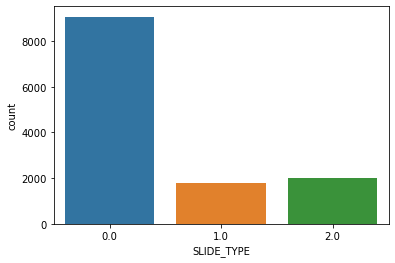

In [21]:
# label ditribution in sythetic data
# filter 
# todo(important!): nothing need to change, but remember to tune the parameter according to the this plot
sns.countplot(new_data['SLIDE_TYPE'] )


In [22]:
# todo(important!): understand the evaluation metric and add it to report 
# and use other metrics with doc below to evaluate and figure out what is wrong with new data
# ref doc: https://sdv.dev/SDV/user_guides/evaluation/index.html#evaluation
evaluate(new_data, train_data)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.6299055379477648

In [23]:
# new train data: the mixture of original and generative data
new_train=pd.concat(
    [new_data, train_data],
    axis=0,
)
print(new_train.shape)
new_train.head()

(25746, 18)


,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,curv_plan,curv_prof,aspect,curv,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y
0,0.0,14.2,8.0,27.787168,170.624119,129.178858,19.388548,0.133082,-0.027475,248.443682,0.268696,59.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,12.7,10.3,35.880178,425.252299,321.565475,1.000000,-0.180362,-0.461785,66.446106,1.174453,59.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,6.4,10.9,20.085732,252.465794,163.042784,4.003355,-0.021803,0.141123,-9999.000000,-0.160952,59.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,19.1,5.4,28.525063,374.680071,361.481624,1.000000,-0.232277,0.080445,134.567410,-0.036369,59.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,7.6,6.6,46.250860,142.300482,148.225948,10.040716,0.193316,-0.387993,103.476500,0.394042,59.0,0.0,1.0,0.0,0.0,1.0,0.0


In [24]:
#shuffle data
new_train_data = new_train.sample(frac=1).reset_index(drop=True)


In [25]:
# convert df to numpy for training input 
new_train_X=new_train_data.iloc[:,1:].values
new_train_Y_1=new_train_data.iloc[:,0:1].values
new_train_Y=np.squeeze(new_train_Y_1)

In [26]:
print(new_train_X.shape)
print(X_test.shape)
print(new_train_Y.shape)
print(y_test.shape)

(25746, 17)
(5518, 17)
(25746,)
(5518,)


In [27]:
# We need to do feature scaling first.
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
#sc = MinMaxScaler()
new_train = sc.fit_transform(new_train_X)
X_test = sc.fit_transform(X_test)

In [28]:
X_train = sc.fit_transform(X_train)

### 1. KNN

### original KNN model

In [176]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# todo: n_jobs=-1, accelerate running speed: https://scikit-learn.org/stable/computing/parallelism.html
model = KNeighborsClassifier(n_jobs=-1)

param_grid = { 
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan'],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1)

grid.fit(X_train, y_train.ravel())

metric = grid.best_estimator_.metric
n_neighbors = grid.best_estimator_.n_neighbors
weights = grid.best_estimator_.weights

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9305811461310517
Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


In [177]:
X_train.shape

(6468, 17)

In [178]:
knn = KNeighborsClassifier(metric=metric, n_neighbors=n_neighbors, weights=weights, n_jobs=-1).fit(X_train, y_train.ravel())
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

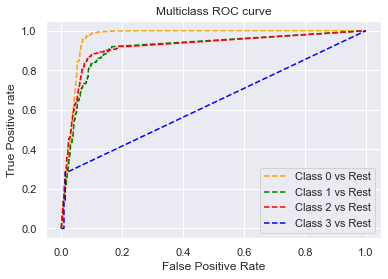

In [125]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, knn_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300);

In [179]:
knn_cls_precision, knn_cls_recall, knn_cls_f1, _ = precision_recall_fscore_support(y_test, knn_pred, average=None, labels=[0,1,2,3])

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [180]:
knn_conf_mat = confusion_matrix(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)
print('k Nearest Neighbors:')
print('Accuracy:',knn_acc)
#print('ROC AUC=%.4f' % (knn_roc_auc))

k Nearest Neighbors:
Accuracy: 0.9267676767676768


Confusion Matrix:


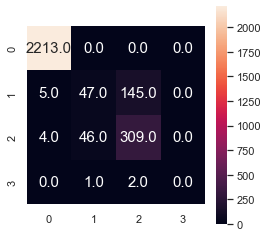

In [181]:
array = confusion_matrix(y_test, knn_pred)

knn_cm = pd.DataFrame(array, range(4), range(4))

plt.figure(figsize=(4,4))
sns.set(font_scale=1) # for label size
sns.heatmap(knn_cm, annot=True, annot_kws={"size": 15}, cbar=True, square= True, fmt='.1f') # font size

print('Confusion Matrix:')
plt.show()

In [182]:
for i in range(n_class): 
    print(i)
    print('Precision  = %.4f ' % (knn_cls_precision[i]))
    print('Recall on Y label = %.4f ' % (knn_cls_recall[i]))
    print('F1 on Y label = %.4f ' % (knn_cls_f1[i]))
    print('----------------------------')

0
Precision  = 0.9959 
Recall on Y label = 1.0000 
F1 on Y label = 0.9980 
----------------------------
1
Precision  = 0.5000 
Recall on Y label = 0.2386 
F1 on Y label = 0.3230 
----------------------------
2
Precision  = 0.6776 
Recall on Y label = 0.8607 
F1 on Y label = 0.7583 
----------------------------
3
Precision  = 0.0000 
Recall on Y label = 0.0000 
F1 on Y label = 0.0000 
----------------------------


### KNN & GAN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# todo: n_jobs=-1, accelerate running speed: https://scikit-learn.org/stable/computing/parallelism.html
model = KNeighborsClassifier(n_jobs=-1)

param_grid = { 
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan'],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1)

grid.fit(new_train_X, new_train_Y.ravel())

metric = grid.best_estimator_.metric
n_neighbors = grid.best_estimator_.n_neighbors
weights = grid.best_estimator_.weights

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.8485979104246842
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [30]:
knn = KNeighborsClassifier(metric=metric, n_neighbors=n_neighbors, weights=weights, n_jobs=8).fit(new_train_X, new_train_Y.ravel())
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

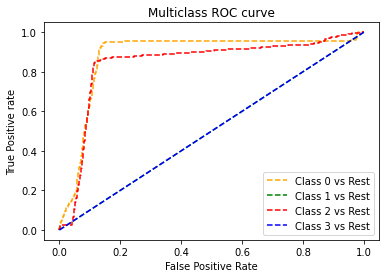

In [31]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, knn_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300);

In [32]:
knn_cls_precision, knn_cls_recall, knn_cls_f1, _ = precision_recall_fscore_support(y_test, knn_pred, average=None, labels=[0,1,2,3])
knn_conf_mat = confusion_matrix(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)
print('k Nearest Neighbors:')
print('Accuracy:',knn_acc)

k Nearest Neighbors:
Accuracy: 0.12975715839072127


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. Random Forest (GAN)

In [62]:
model = RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(10,30,2),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(new_train_X, new_train_Y.ravel())

n_estimators = grid.best_estimator_.n_estimators
criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.8721522740661888
Best hyperparameters: {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 300}


In [63]:
rf = RandomForestClassifier(random_state=0, criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators = n_estimators).fit(new_train_X, new_train_Y.ravel())

In [64]:
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)

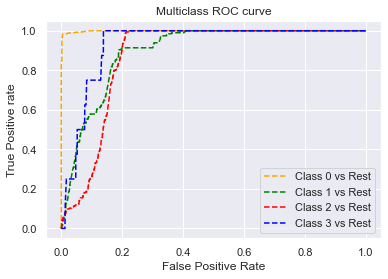

In [65]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, rf_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300);

In [66]:
rf_cls_precision, rf_cls_recall, rf_cls_f1, _ = precision_recall_fscore_support(y_test, rf_pred, average=None, labels=[0,1,2,3])

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
rf_conf_mat = confusion_matrix(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)
print('Random Forest:')
print('Accuracy:',rf_acc)

Random Forest:
Accuracy: 0.7660882140274765


Confusion Matrix:


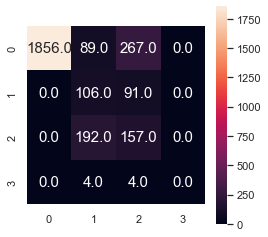

In [69]:
array = confusion_matrix(y_test, rf_pred)

rf_cm = pd.DataFrame(array, range(4), range(4))

plt.figure(figsize=(4,4))
sns.set(font_scale=1) # for label size
sns.heatmap(rf_cm, annot=True, annot_kws={"size": 15}, cbar=True, square= True, fmt='.1f') # font size

print('Confusion Matrix:')
plt.show()

## origin model

In [203]:
model = RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(10,30,2),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

n_estimators = grid.best_estimator_.n_estimators
criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9465061542893549
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500}


In [204]:
rf = RandomForestClassifier(random_state=0, criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators = n_estimators).fit(X_train,y_train.ravel())

rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)

In [205]:
rf_cls_precision, rf_cls_recall, rf_cls_f1, _ = precision_recall_fscore_support(y_test, rf_pred, average=None, labels=[0,1,2,3])
rf_conf_mat = confusion_matrix(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)
print('k Nearest Neighbors:')
print('Accuracy:',rf_acc)

k Nearest Neighbors:
Accuracy: 0.9523809523809523


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3. Logistic Regression

In [186]:
model = LogisticRegression(random_state=0, solver = 'liblinear')

param_grid={'C':np.logspace(-3,3,7), # inverse of regularization strength
     }

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

C = grid.best_estimator_.C

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9338283301716173
Best hyperparameters: {'C': 100.0}


In [187]:
lr = LogisticRegression(random_state =0, solver = 'liblinear', C=C).fit(X_train,y_train.ravel())

In [188]:
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)

In [189]:
lr_conf_mat = confusion_matrix(y_test, lr_pred)
lr_acc = accuracy_score(y_test, lr_pred)
print('Logistic Regression:')
print('Accuracy:',lr_acc)

Logistic Regression:
Accuracy: 0.9314574314574314


## GAN

In [33]:
model = LogisticRegression(random_state=0, solver = 'liblinear')

param_grid={'C':np.logspace(-3,3,7), # inverse of regularization strength
     }

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(new_train_X, new_train_Y.ravel())

C = grid.best_estimator_.C

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Best score: 0.8829331965675303
Best hyperparameters: {'C': 10.0}


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [34]:
lr = LogisticRegression(random_state =0, solver = 'liblinear', C=C).fit(new_train_X, new_train_Y.ravel())

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [35]:
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)

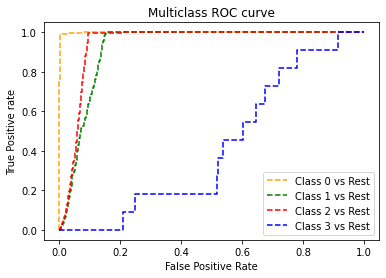

In [36]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, lr_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300);

In [37]:
lr_cls_precision, lr_cls_recall, lr_cls_f1, _ = precision_recall_fscore_support(y_test, lr_pred, average=None, labels=[0,1,2,3])
lr_conf_mat = confusion_matrix(y_test, lr_pred)
lr_acc = accuracy_score(y_test, lr_pred)
print('Logistic regression:')
print('Accuracy:',lr_acc)
#print('ROC AUC=%.4f' % (knn_roc_auc))

Logistic regression:
Accuracy: 0.9142805364262414


Confusion Matrix:


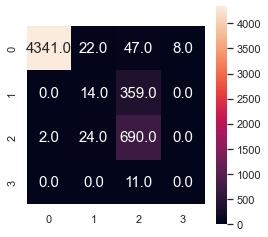

In [38]:
array = confusion_matrix(y_test, lr_pred)

lr_cm = pd.DataFrame(array, range(4), range(4))

plt.figure(figsize=(4,4))
sns.set(font_scale=1) # for label size
sns.heatmap(lr_cm, annot=True, annot_kws={"size": 15}, cbar=True, square= True, fmt='.1f') # font size

print('Confusion Matrix:')
plt.show()

In [39]:
for i in range(n_class): 
    print(i)
    print('Precision  = %.4f ' % (lr_cls_precision[i]))
    print('Recall on Y label = %.4f ' % (lr_cls_recall[i]))
    print('F1 on Y label = %.4f ' % (lr_cls_f1[i]))
    print('----------------------------')

0
Precision  = 0.9995 
Recall on Y label = 0.9826 
F1 on Y label = 0.9910 
----------------------------
1
Precision  = 0.2333 
Recall on Y label = 0.0375 
F1 on Y label = 0.0647 
----------------------------
2
Precision  = 0.6233 
Recall on Y label = 0.9637 
F1 on Y label = 0.7570 
----------------------------
3
Precision  = 0.0000 
Recall on Y label = 0.0000 
F1 on Y label = 0.0000 
----------------------------


## 3.decision tree

In [194]:
model = DecisionTreeClassifier(random_state=0)

param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(10,40,5),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(X_train, y_train.ravel())

criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.9352182899000802
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto'}


In [195]:
dt = DecisionTreeClassifier(random_state=0, criterion = criterion, max_depth=max_depth, max_features=max_features).fit(X_train, y_train.ravel())
dt_pred = dt.predict(X_test)
dt_proba = dt.predict_proba(X_test)

dt_conf_mat = confusion_matrix(y_test, dt_pred)
dt_acc = accuracy_score(y_test, dt_pred)
print('Decision Tree:')
print('Accuracy:',dt_acc)

Decision Tree:
Accuracy: 0.9336219336219336


## GAN

In [40]:
model = DecisionTreeClassifier(random_state=0)

param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(10,40,5),
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(new_train_X, new_train_Y.ravel())

criterion = grid.best_estimator_.criterion
max_depth = grid.best_estimator_.max_depth
max_features = grid.best_estimator_.max_features

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.88464228137427
Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}


In [41]:
dt = DecisionTreeClassifier(random_state=0, criterion = criterion, max_depth=max_depth, max_features=max_features).fit(new_train_X, new_train_Y.ravel())
dt_pred = dt.predict(X_test)
dt_proba = dt.predict_proba(X_test)

dt_conf_mat = confusion_matrix(y_test, dt_pred)
dt_acc = accuracy_score(y_test, dt_pred)
print('Decision Tree:')
print('Accuracy:',dt_acc)

Decision Tree:
Accuracy: 0.1293947082276187


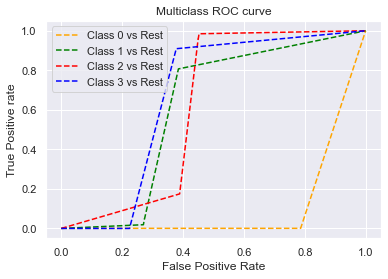

In [42]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, dt_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300);

Decision Tree Confusion Matrix:


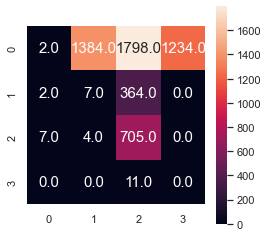

In [43]:
array = confusion_matrix(y_test, dt_pred)

dt_cm = pd.DataFrame(array, range(4), range(4))

plt.figure(figsize=(4,4))
sns.set(font_scale=1) # for label size
sns.heatmap(dt_cm, annot=True, annot_kws={"size": 15}, cbar=True, square= True, fmt='.1f') # font size

print('Decision Tree Confusion Matrix:')
plt.show()